In [29]:
import pandas as pd

df = pd.read_csv('Output_19673628_0.out')
df.head()


,cuda will be used for training the PaiNN model
0,Current loss 50.2569580078125 Current batch 0/...
1,Current loss 0.34790122509002686 Current batch...
2,Current loss 0.23963972926139832 Current batch...
3,Current loss 0.21868157386779785 Current batch...
4,Current loss 0.2550046443939209 Current batch ...


In [30]:
df_train_loss = pd.DataFrame(columns=df.columns)
for i in range(len(df)):
    if 'Current loss' in df.iloc[i, 0]:
        # Extract only the numbers after 'is'
        number = df.iloc[i, 0].split('loss')[-1].strip().split(' ')[0]
        df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)


df_train_loss.training_loss = df_train_loss.training_loss.astype(float)


/tmp/ipykernel_8478/3254065930.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/3254065930.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/3254065930.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/3254065930.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number},

In [31]:

# average for every 11 rows
df_train_loss = df_train_loss.groupby(df_train_loss.index // 11).mean()


In [32]:
df_validation_loss = pd.DataFrame(columns=df.columns)
for i in range(len(df)):
    if 'is' in df.iloc[i, 0]:
        # Extract only the numbers after 'is'
        number = df.iloc[i, 0].split('is')[-1].strip()
        df_validation_loss = df_validation_loss.append({'validation_loss': number}, ignore_index=True)


df_validation_loss.validation_loss = df_validation_loss.validation_loss.astype(float)


/tmp/ipykernel_8478/1705392899.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_validation_loss = df_validation_loss.append({'validation_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/1705392899.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_validation_loss = df_validation_loss.append({'validation_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/1705392899.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_validation_loss = df_validation_loss.append({'validation_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/1705392899.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_validation_loss = df_val

In [15]:
# denne er ikke meaned

# df_train_loss = pd.DataFrame(columns=df.columns)
# for i in range(len(df)):
#     if 'Current batch 1000/1047' in df.iloc[i, 0]:
#         # Extract only the numbers after 'is'
#         number = df.iloc[i, 0].split('loss')[-1].strip().split(' ')[0]
#         df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)


# df_train_loss.training_loss = df_train_loss.training_loss.astype(float)


/tmp/ipykernel_8478/2704737325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/2704737325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/2704737325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number}, ignore_index=True)
/tmp/ipykernel_8478/2704737325.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_loss = df_train_loss.append({'training_loss': number},

In [33]:
# make a df with both training and validation loss
df_loss = pd.concat([df_train_loss, df_validation_loss], axis=1)
df_loss.head()

# drop columns 'cuda will be used for training the PaiNN model' and 'cuda will be used for training the PaiNN model'
df_loss.drop(columns=['cuda will be used for training the PaiNN model', 'cuda will be used for training the PaiNN model'], inplace=True)


(0.11, 0.45)

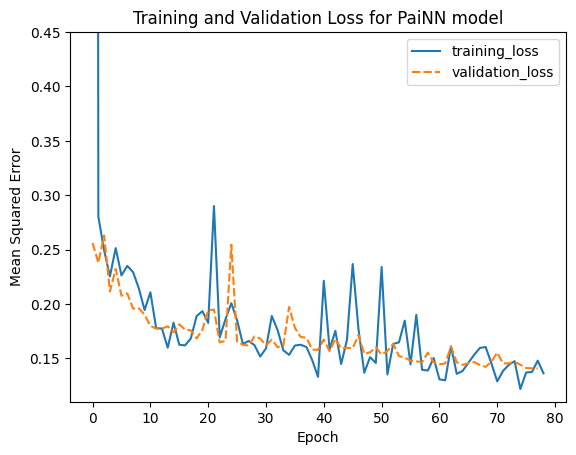

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sns.lineplot(data=df_loss, x=df2.index, y=df2.column1)
sns.lineplot(data=df_loss)

# x-axis
plt.xlabel('Epoch')
# y-axis
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss for PaiNN model')
# set the y-axis range from 0 to 1
plt.ylim(0.11, 0.45)
